![BTS](https://github.com/vfp1/bts-dsf-2020/blob/main/Logo-BTS.jpg?raw=1)

# Assignement Session 5 and 6

### Victor F. Pajuelo Madrigal <victor.pajuelo@bts.tech> - Data Science Foundations (2020-11-12)

Open this notebook in Google Colaboratory: [![Open in Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/vfp1/bts-dsf-2020/blob/main/exercises/Session_5_6_EXERCISES.ipynb)

# EXERCISE 1: image filtering

From the datasets (images) available from [skimage data](https://scikit-image.org/docs/dev/api/skimage.data.html), choose an **RGB** image and do the following:

* Crop the image
* Smoothen the image with a kernel filter.
* Sharpen the image with a kernel filter
* Find the edges of the image with at least two different methods.
* From the processes above, save the image that you prefer as a .jpg

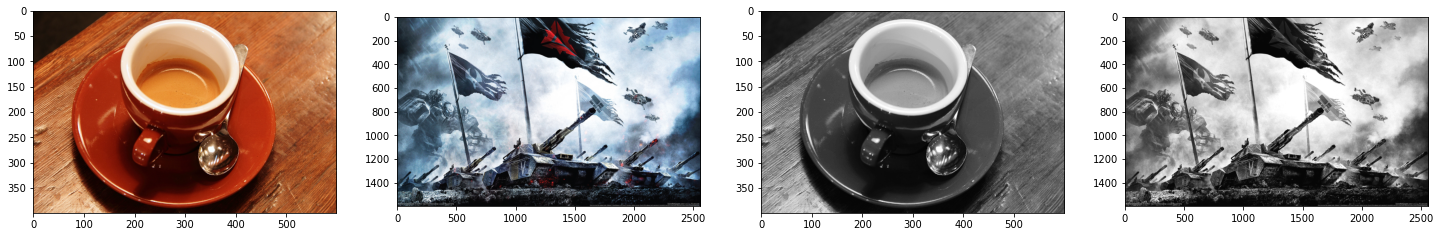

In [18]:

import matplotlib.pyplot as plt
import pandas as pd 
import imageio
from skimage import data
from skimage.color import rgb2hsv ,rgb2gray 
from scipy import ndimage
import numpy as np

# import image ( added a second picture for fun)


image = data.coffee()
gray_image = rgb2gray(image)

cool_image = imageio.imread('/content/212218.jpg')
gray_cool = rgb2gray(cool_image )

fig, ax = plt.subplots(ncols=4, figsize=(25, 25))
ax[0].imshow(image )
ax[1].imshow(cool_image)
ax[2].imshow(gray_image,cmap=plt.cm.gray )
ax[3].imshow(gray_cool,cmap=plt.cm.gray )

## Crop the image

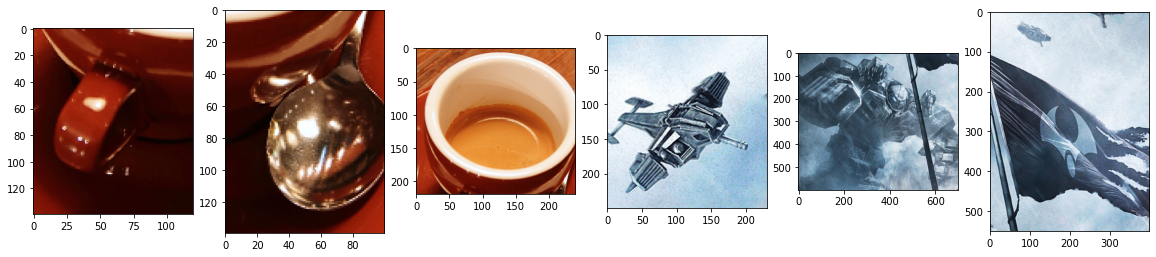

In [19]:
#Crop the image

fig, ax = plt.subplots(ncols=6, figsize=(20, 20))
ax[0].imshow(image[200:340,180:300])
ax[1].imshow(image[200:340,300:400])
ax[2].imshow(image[10:230,160:400])
ax[3].imshow(cool_image[0:250,1920:2150])
ax[4].imshow(cool_image[600:1200,0:700])
ax[5].imshow(cool_image[200:750,450:850])

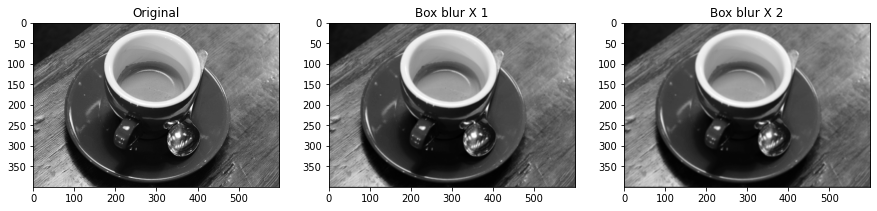

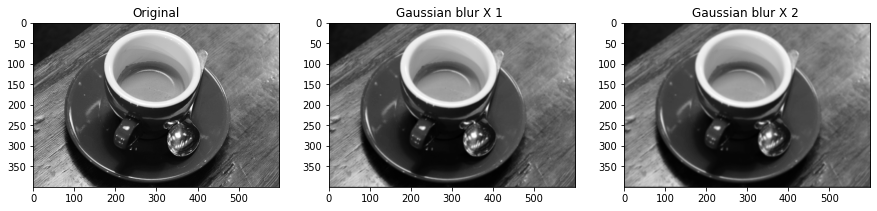

In [20]:
#Smoothen the image with a kernel filter.

#1 create Kenrals 

Blur_kernel = np.array([ [1/9,1/9,1/9], 
                    [1/9,1/9,1/9], 
                    [1/9,1/9,1/9]]) 
gussian_kernel = 1/256*np.array([ [1, 4, 6, 4, 1], 
                        [4, 16, 24, 16, 4], 
                        [6, 24, 36, 24, 6],
                        [4, 16, 24, 16, 4],
                        [1, 4, 6, 4, 1]]) 


#2 Smooth Images 

# 2.1 using Blur Kernal
smooth_image1 = ndimage.convolve(gray_image, Blur_kernel, mode='constant', cval=0.0)
smooth_image12 = ndimage.convolve(smooth_image1, Blur_kernel, mode='constant', cval=0.0)



#  2.2 using Gussian Kernal 
smooth_image2 = ndimage.convolve(gray_image, gussian_kernel, mode='constant', cval=0.0)
smooth_image22 = ndimage.convolve(smooth_image2 , gussian_kernel, mode='constant', cval=0.0)

#3 display 
fig, ax = plt.subplots(ncols=3, figsize=(15, 15))
ax[0].set_title('Original')
ax[0].imshow(gray_image,cmap=plt.cm.gray )
ax[1].set_title('Box blur X 1')
ax[1].imshow(smooth_image1 ,cmap=plt.cm.gray  )
ax[2].set_title('Box blur X 2')
ax[2].imshow(smooth_image12 ,cmap=plt.cm.gray  )
fig, ax = plt.subplots(ncols=3, figsize=(15, 15))
ax[0].set_title('Original')
ax[0].imshow(gray_image,cmap=plt.cm.gray )
ax[1].set_title('Gaussian blur X 1 ')
ax[1].imshow(smooth_image2 ,cmap=plt.cm.gray  )
ax[2].set_title('Gaussian blur X 2 ')
ax[2].imshow(smooth_image22 ,cmap=plt.cm.gray  )



## Smoothen the image with a kernel filter.

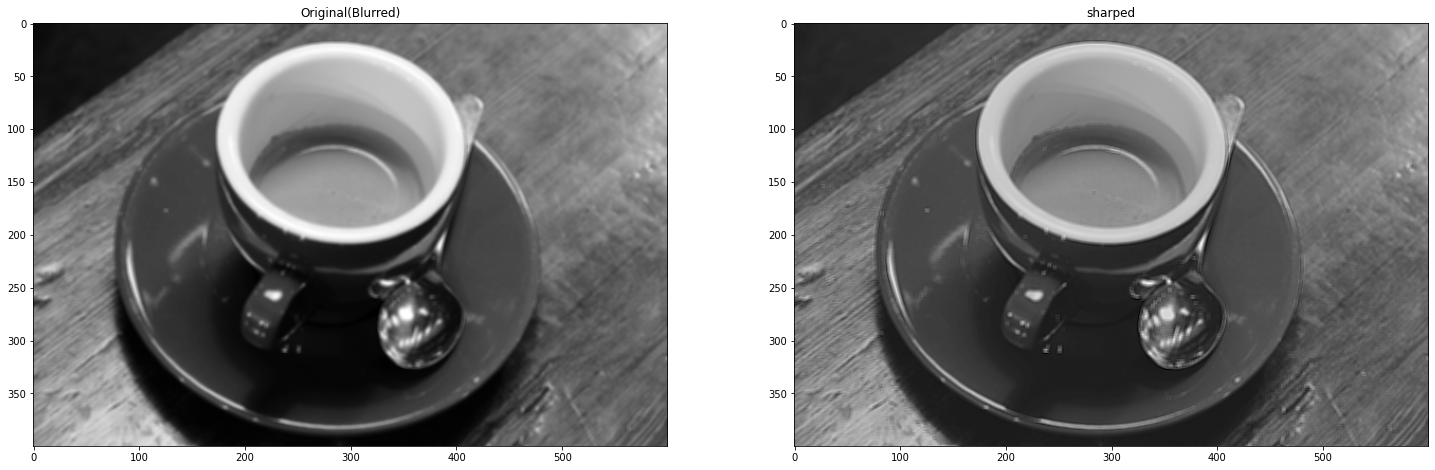

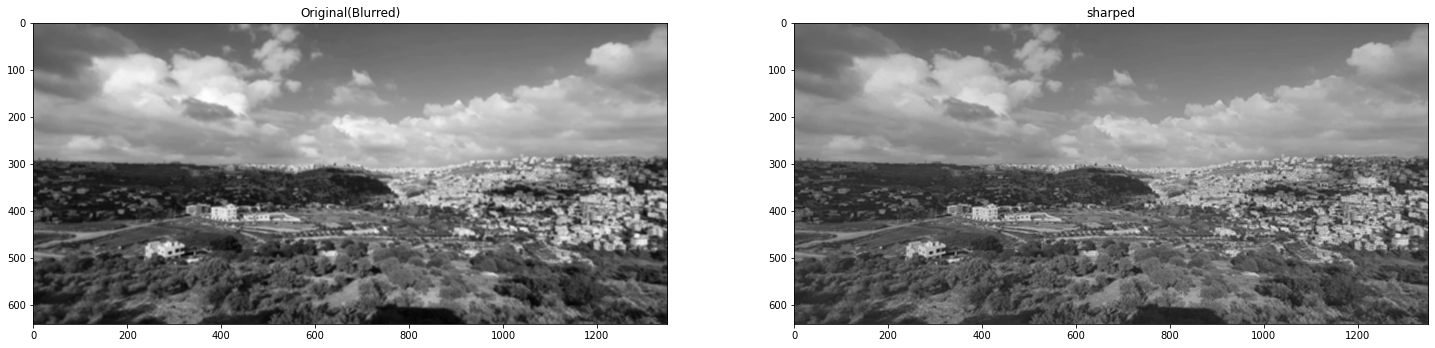

In [22]:
#Sharpen the image with a kernel filter


#I imported an additional image for fun 
image_cool = imageio.imread('/content/home.jpg')
gray_cool = rgb2gray(image_cool)


#-1 Import Image and blurr it . 
image = data.coffee() 
gray_image = rgb2gray(image)
blur_image = ndimage.uniform_filter(gray_image, size=4)


gray_cool = rgb2gray(image_cool)
blur_cool = ndimage.uniform_filter(gray_cool, size=5)

#-2 Sharpen Image 


kernel_sharpen = np.array([ [0, -1, 0], 
                             [-1,5, -1], 
                             [0, -1, 0]])

sharpen_image = ndimage.convolve((blur_image), kernel_sharpen,  mode='mirror', cval=1.0)


sharpen_cool = ndimage.convolve((blur_cool), kernel_sharpen,  mode='nearest', cval=1.0)


#-3 Display
fig, ax = plt.subplots(ncols=2, figsize=(25, 25))
ax[0].set_title('Original(Blurred)')
ax[0].imshow(blur_image ,cmap=plt.cm.gray  )
ax[1].set_title('sharped')
ax[1].imshow(sharpen_image,cmap=plt.cm.gray)



fig, ax = plt.subplots(ncols=2, figsize=(25, 25))
ax[0].set_title('Original(Blurred)')
ax[0].imshow(blur_cool ,cmap=plt.cm.gray  )
ax[1].set_title('sharped')
ax[1].imshow(sharpen_cool,cmap=plt.cm.gray)



## Find the edges of the image with at least two different methods.

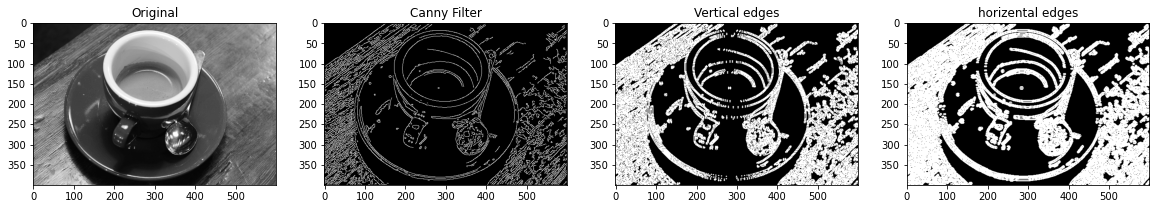

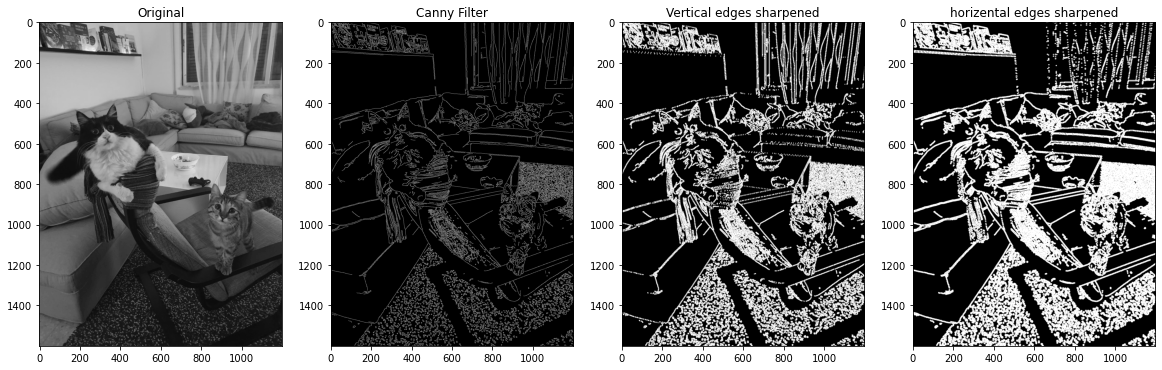

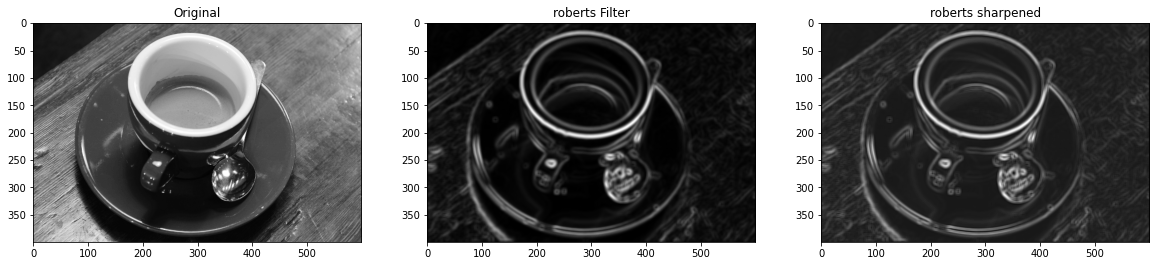

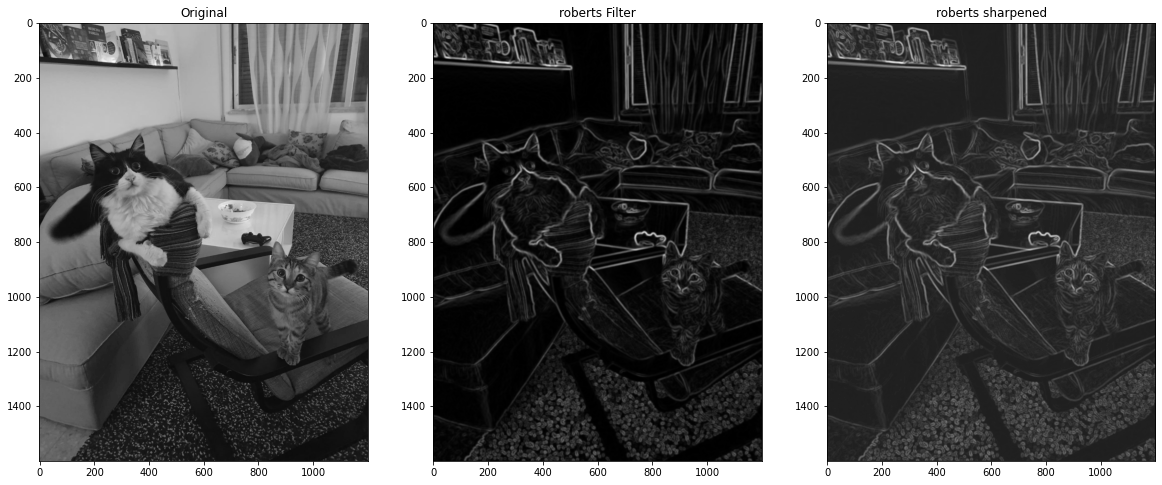

In [23]:
#Find the edges of the image with at least two different methods.


#after several experiments I decided to use the Canny filter then sharpen it ( horizental and vertical)
from skimage.feature import canny

#1 Import Image additional photo for fun 


image = data.coffee()
gray_image = rgb2gray(image)

image2 = imageio.imread('/content/cats.jpeg')
gray_image2 = rgb2gray(image2)

#2 High frequency extraction (edges) using horizental and virtical kernals 
kernel_v = np.array([[-1, 0, 1], 
                    [-1, 0, 1], 
                    [-1, 0, 1]])

kernel_h = np.array([ [1, 1, 1], 
                    [0, 0, 0], 
                    [-1, -1, -1]])

kernel_sharpen2 = np.array([ [0, -1, 0], 
                    [-1,5, -1], 
                    [0, -1, 0]])



# 2.1 I used canny filter to highlight then special filter then sharpened the image 
image_filtered1 = canny(gray_image ) # filter canny
image_filtered2 = ndimage.convolve(image_filtered1 , kernel_v, mode='constant', cval=0)#Vertical edges kenral
image_filtered2 = ndimage.convolve(image_filtered2, kernel_sharpen2,  mode='mirror', cval=0.0)#sharpen


image_filtered3  = ndimage.convolve(image_filtered1, kernel_h, mode='constant', cval=0) # horizental edges kernal 
image_filtered3 = ndimage.convolve(image_filtered3, kernel_sharpen2,  mode='mirror', cval=0.0)#sharpen
image_filtered3 = ndimage.convolve(image_filtered3, kernel_sharpen2,  mode='mirror', cval=0.0)#sharpen again 


image2_filtered1 = canny(gray_image2 ) # filter canny
image2_filtered2 = ndimage.convolve(image2_filtered1 , kernel_v, mode='constant', cval=0) #Vertical edges kenral
image2_filtered2 = ndimage.convolve(image2_filtered2, kernel_sharpen2,  mode='mirror', cval=0.0)#sharpen

image2_filtered3  = ndimage.convolve(image2_filtered1, kernel_h, mode='constant', cval=0) # horizental edges kernal 
image2_filtered3 = ndimage.convolve(image2_filtered3, kernel_sharpen2,  mode='mirror', cval=0.0)#sharpen
image2_filtered3 = ndimage.convolve(image2_filtered3, kernel_sharpen2,  mode='mirror', cval=0.0)#sharpen again 

##2.1 blur then roberts filter then sharpen 
from skimage.filters import roberts    

image_blur1 = ndimage.uniform_filter(gray_image , size=7) # blur
image_filtered1r = roberts(image_blur1) # robert filter 
image_filtered1r  = ndimage.uniform_filter(image_filtered1r , size=5) # blur 
image_filtered2r = ndimage.convolve(image_filtered1r , kernel_sharpen2,  mode='mirror', cval=0.0) # sharpen 


image_blur2= ndimage.uniform_filter(gray_image2 , size=7) # blur
image2_filtered1r = roberts(image_blur2 ) # robert filter 
image2_filtered1r = ndimage.uniform_filter(image2_filtered1r, size=5) # blur
image2_filtered2r = ndimage.convolve(image2_filtered1r, kernel_sharpen2,  mode='mirror', cval=0.0) # sharpen 


#3 display 
fig, ax = plt.subplots(ncols=4, figsize=(20, 20))
ax[0].set_title('Original')
ax[0].imshow(gray_image ,cmap=plt.cm.gray  )
ax[1].set_title('Canny Filter')
ax[1].imshow(image_filtered1,cmap=plt.cm.gray)
ax[2].set_title('Vertical edges')
ax[2].imshow(image_filtered2,cmap=plt.cm.gray)
ax[3].set_title('horizental edges')
ax[3].imshow(image_filtered3,cmap=plt.cm.gray)


fig, ax = plt.subplots(ncols=4, figsize=(20, 20))
ax[0].set_title('Original')
ax[0].imshow(gray_image2 ,cmap=plt.cm.gray  )
ax[1].set_title('Canny Filter')
ax[1].imshow(image2_filtered1,cmap=plt.cm.gray)
ax[2].set_title('Vertical edges sharpened')
ax[2].imshow(image2_filtered2,cmap=plt.cm.gray)
ax[3].set_title('horizental edges sharpened')
ax[3].imshow(image2_filtered3,cmap=plt.cm.gray)


fig, ax = plt.subplots(ncols=3, figsize=(20, 20))
ax[0].set_title('Original')
ax[0].imshow(gray_image ,cmap=plt.cm.gray  )
ax[1].set_title('roberts Filter')
ax[1].imshow(image_filtered1r,cmap=plt.cm.gray)
ax[2].set_title('roberts sharpened')
ax[2].imshow(image_filtered2r,cmap=plt.cm.gray)



fig, ax = plt.subplots(ncols=3, figsize=(20, 20))
ax[0].set_title('Original')
ax[0].imshow(gray_image2 ,cmap=plt.cm.gray  )
ax[1].set_title('roberts Filter')
ax[1].imshow(image2_filtered1r,cmap=plt.cm.gray)
ax[2].set_title('roberts sharpened')
ax[2].imshow(image2_filtered2r,cmap=plt.cm.gray)




# EXERCISE 2: semi-super resolution!

Take one image on your own (or one blurred image from somewhere) and apply the techniques we have seen in class to sharpen an image from a blurred one. You can also blur one image of your own as a start.

## Import Image

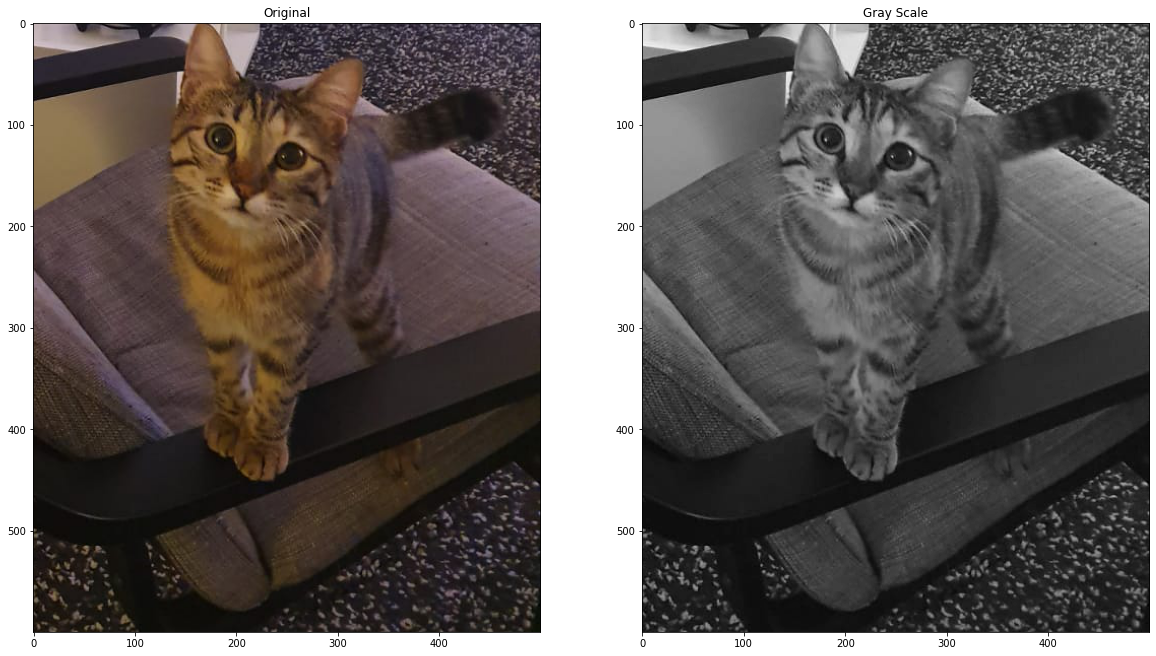

In [24]:
#Import Images

cat_image = imageio.imread('/content/cats.jpeg')
cat_image = cat_image[800:1400 , 700:]
gray_cat = rgb2gray(cat_image)

fig, ax = plt.subplots(ncols=2, figsize=(20, 20))
ax[0].set_title('Original')
ax[0].imshow(cat_image ,cmap=plt.cm.gray  )
ax[1].set_title('Gray Scale')
ax[1].imshow(gray_cat,cmap=plt.cm.gray)


## blur cat images then sharpen them 

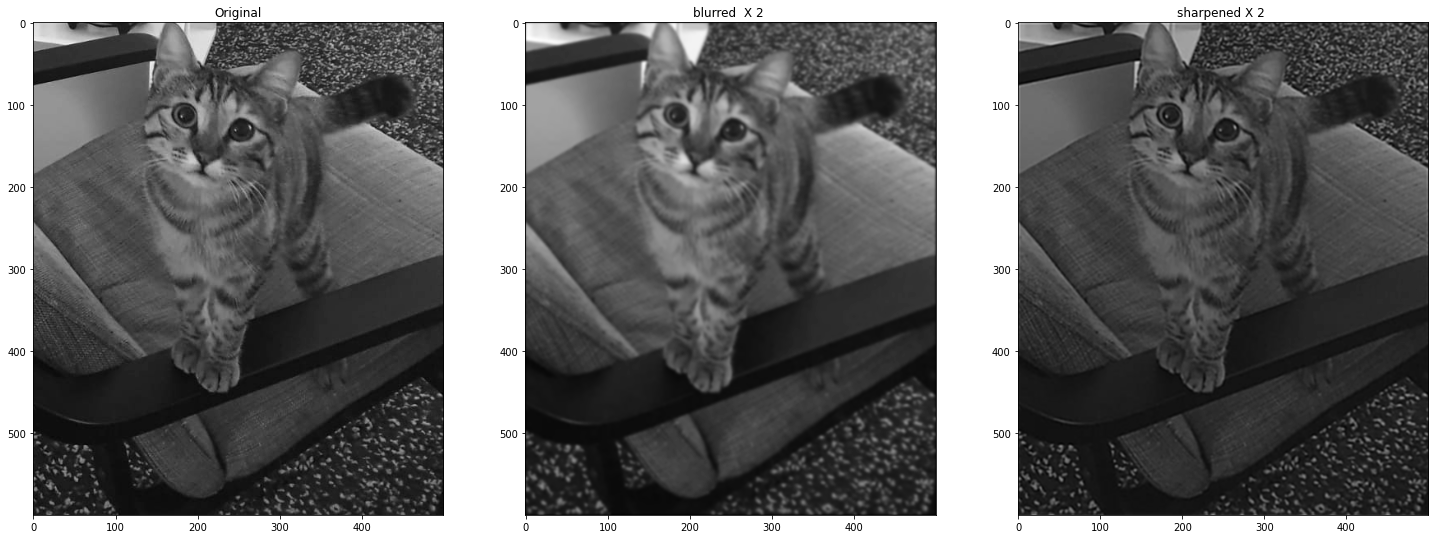

In [26]:
#blur cat images then sharpen them 

#1 Imported Image and defined kernal
cat_image = imageio.imread('/content/cats.jpeg')
cat_image = cat_image[800:1400 , 700:]
gray_cat = rgb2gray(cat_image)


blur_kernel = 1/256*np.array([ [1, 4, 6, 4, 1], 
                        [4, 16, 24, 16, 4], 
                        [6, 24, 36, 24, 6],
                        [4, 16, 24, 16, 4],
                        [1, 4, 6, 4, 1]]) 


#2 - blurred the image twice 
blurred = ndimage.convolve(gray_cat, blur_kernel , mode='constant', cval=0.0)
blurred = ndimage.convolve(blurred, blur_kernel , mode='constant', cval=0.0)

#3 Sharpened the image twice

sh_kernel = np.array([ [0, -1, 0], 
                    [-1, 5, -1], 
                    [0, -1, 0]])

sharpe_cat = ndimage.convolve(blurred, sh_kernel, mode='constant', cval=0.0)
sharpe_cat = ndimage.convolve(sharpe_cat, sh_kernel, mode='constant', cval=0.0)


#4 display Iamges 
fig, ax = plt.subplots(ncols=3, figsize=(25, 25))
ax[0].set_title('Original')
ax[0].imshow(gray_cat ,cmap=plt.cm.gray  )
ax[1].set_title('blurred  X 2 ')
ax[1].imshow(blurred,cmap=plt.cm.gray)
ax[2].set_title('sharpened X 2 ')
ax[2].imshow(sharpe_cat,cmap=plt.cm.gray)

# EXERCISE 3: image segmentation
Take a picture with your phone or your camera of some objects that you want to count. (Beware: try to take high contrast images with a stable background, preferably dark over white or similar such as coins, chessboard, etc.).

Load the image with scikit image
Count the objects in the image using region based segmentation
Try to fix the image using opening/closing algorithms

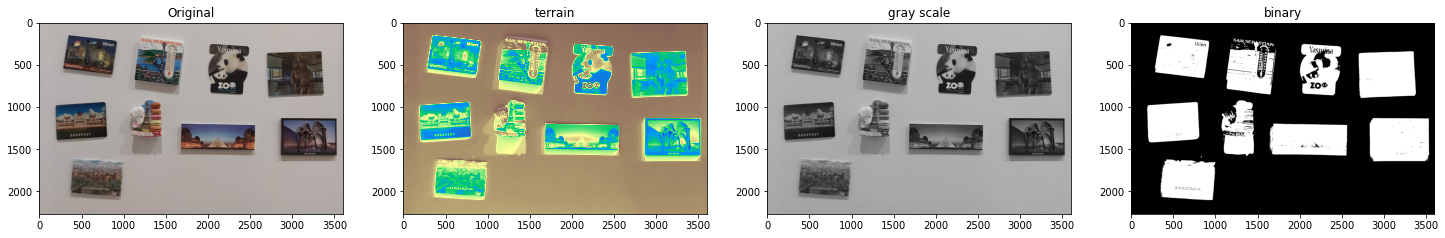

In [27]:

from scipy import ndimage as ndi
from skimage.io import imshow

# 1 - Imported an Image(magnets on my fridge) then convereted it to binary.  
things = imageio.imread('/content/things.jpg')
things =  things[:,:3600]
things_gray = rgb2gray(things)
binary_things = things_gray  < 0.6



fig, ax = plt.subplots(ncols=4, figsize=(25, 25))

ax[0].set_title('Original')
ax[0].imshow(things ,cmap=plt.cm.gray  )

ax[1].set_title('terrain')
ax[1].imshow(things_gray, cmap=plt.cm.terrain)

ax[2].set_title('gray scale')
ax[2].imshow(things_gray,cmap=plt.cm.gray)

ax[3].set_title('binary')
ax[3].imshow(binary_things,cmap=plt.cm.gray)

### performed closing & opening to get rid of the  noise  anf fill the objects. 

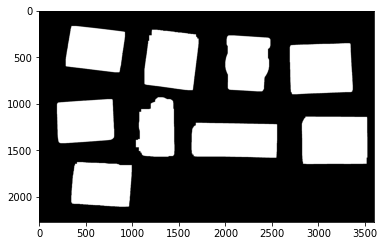

In [28]:
# 2 performed closing & opening to get rid of the  noise  anf fill the objects. 

binary_closing = ndimage.binary_closing(binary_things, structure=np.ones((80,80))).astype(binary_things.dtype)
binary_closing  = ndimage.binary_opening(binary_closing , structure=np.ones((50,50))).astype(binary_things.dtype)
plt.imshow(binary_closing , cmap=plt.cm.gray)

### count the number of label objects 

In [30]:
#  3 count the number of label objects 
print('numbrt of objects is ', ndi.label(binary_closing)[1])


numbrt of objects is  9
